Total Height Counted in Day1.jpg: 4.27 cm
Total Height Counted in Day2.jpg: 3.59 cm
Total Height Counted in Day3.jpg: 4.16 cm
Total Height Counted in Day4.jpg: 4.29 cm
Total Height Counted in Day5.jpg: 5.54 cm
Total Height Counted in Day6.jpg: 8.71 cm
Total Height Counted in Day7.jpg: 11.28 cm
Total Height Counted in Day8.jpg: 11.29 cm
Total Height Counted in Day9.jpg: 13.91 cm
Total Height Counted in Day10.jpg: 13.48 cm
Total Height Counted in Day11.jpg: 14.92 cm


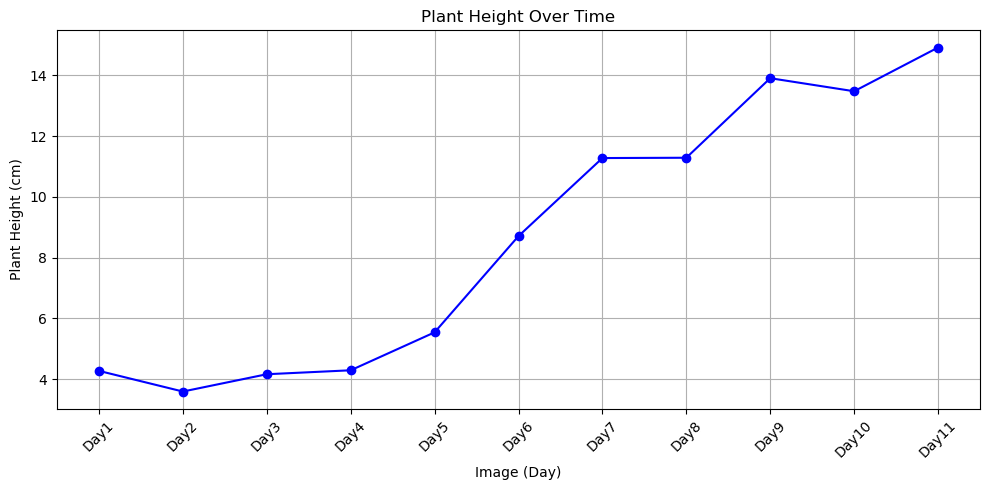

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder with plant images
image_folder = "Plant_Images/Plant_height"
PIXEL_TO_CM = 0.005  # Adjust this based on your scaling

# Function to extract day number from filename (e.g., 'day3.jpg' -> 3)
def extract_day_number(filename):
    match = re.search(r'day(\d+)', filename.lower())
    return int(match.group(1)) if match else float('inf')

# Get image file names and sort by day number
image_files = sorted(
    [f for f in os.listdir(image_folder) if f.endswith((".jpg", ".png", ".jpeg"))],
    key=extract_day_number
)

# Store results
heights_cm = []
image_names = []

# Function to calculate plant height
def get_plant_height(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image: {image_path}")
        return 0

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = np.ones((5, 5), np.uint8)
    cleaned = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

    contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        return 0

    _, _, _, h = cv2.boundingRect(np.vstack(contours))
    return h * PIXEL_TO_CM  # Convert to cm

# Analyze all images
for img_file in image_files:
    img_path = os.path.join(image_folder, img_file)
    height_cm = max(get_plant_height(img_path) - 1.13, 0)  # reduce the cup  size
    heights_cm.append(round(height_cm, 2))
    image_names.append(os.path.splitext(img_file)[0])
    print(f'Total Height Counted in {img_file}: {height_cm:.2f} cm')


# Plotting the plant height chart
if heights_cm:
    plt.figure(figsize=(10, 5))
    plt.plot(image_names, heights_cm, marker='o', color='blue', linestyle='-')
    plt.xlabel("Image (Day)")
    plt.ylabel("Plant Height (cm)")
    plt.title("Plant Height Over Time")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No valid images or heights found.")
